# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2024
## Lab 4: Gordus 
## March 01, 2024

#  Atomic Distances from a PDB file

For this lab, you will be calculating bond distances and angles from the file 1u70.pdb which contains the structure coordinates for the enzyme dihydrofolate reductase from mouse (mDHFR), bound to the inhibitor methotrexate (MTX), which is used in cancer chemotherapy.

PDB files can be opened with a text editor, and have all sorts of useful metadata which you can read directly by opening the file in a text editor, or by extracting with some conveniently written libraries.

**For this lab, you will need to pip install two libraries:**

BioPython: This library has all sorts of useful functions that are commonly used in bio and bioinformatics research.

`pip install biopython` or
`conda install biopython`

RamachanDraw: This library conveniently extracts psi & phi angles from PDB files, and produces Ramachandran plots

`pip install RamachanDraw`

For `conda` users,
- install `pip` in your environment (`conda install pip`)
- activate env
- use `pip install RamachanDraw` inside env

In [12]:
# These are the libraries you will need for this lab

import matplotlib.pyplot as plt
import numpy as np
import re
import ramachandraw
from scipy import stats
from ramachandraw.utils import fetch_pdb, get_phi_psi, plot
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser(PERMISSIVE=1)


# Function: extract_coords:

This is a function I wrote to make extracting coordinate data easier on you. It produces dictionaries of atomic coordinates for the protein residues (aa_res) and MTX residues (mtx_res).

aa_res has 4 keys: 'name','C','N','O'

Each atom is a list of that atom type. The list as follows:

['Atom Type',coordinate vector]

For Carbon (C), the order of the carbons is:

C-alpha (CA), C-carboxyl (C), sidechain C's

For Nitrogen (N), the order of nitrogens is:

N-amide (N), sidechain N's

For Oxygen, the order is:

O-carboxyl (O), sidechain O's

For example, if I wanted the name of sixth amino acid, I would type:

`aa_res[5]['name']`

(Remember, we start counting at 0).

This should return 'CYS'.

If I want the coordinates for the alpha-Carbon for this residue:

`aa_res[5]['C'][0][1]`

If I want the id of this carbon:

`aa_res[5]['C'][0][0]`

For MTX, there are no amino acids, so the keys for mtx_res are: 'C','N','O'

The entire MTX dictionary is essentially treated like one amino acid. So if you want the carbon ID for 4th carbon, you would type:

`mtx_res['C'][3][0]`

If you wanted the coordinates for that carbon, it would be:

`mtx_res['C'][3][1]`

In [24]:
def extract_coords(pdb_object):
    model1 = pdb_object[0]

    chain_A = model1['A']

    aa_res = {}
    mtx_res = {}


    for residue in chain_A:
        residue_id = residue.id
        # Only AA residues
        if  bool(re.search(' ',residue_id[0])):
            if residue_id[1] == 5:
                res_temp = residue
            aa_res[residue_id[1]-1] = {}
            aa_res[residue_id[1]-1]['name'] = residue.resname
            aa_res[residue_id[1]-1]['C'] = []
            aa_res[residue_id[1]-1]['N'] = []
            aa_res[residue_id[1]-1]['O'] = []
            
            for atom in residue:
                if bool(re.search('C',atom.name)):
                    aa_res[residue_id[1]-1]['C'].append([atom.name,atom.coord])
                if bool(re.search('N',atom.name)):
                    aa_res[residue_id[1]-1]['N'].append([atom.name,atom.coord])
                if bool(re.search('O',atom.name)):
                    aa_res[residue_id[1]-1]['O'].append([atom.name,atom.coord])
                    
        # Only MTX residues
        elif bool(re.search('H_MTX',residue_id[0])):
            mtx_res['C'] = []
            mtx_res['N'] = []
            mtx_res['O'] = []
            for atom in residue:
                if bool(re.search('C',atom.name)):
                    mtx_res['C'].append([atom.name,atom.coord])
                if bool(re.search('N',atom.name)):
                    mtx_res['N'].append([atom.name,atom.coord])
                if bool(re.search('O',atom.name)):
                    mtx_res['O'].append([atom.name,atom.coord])
                    
    return aa_res, mtx_res

PDB_id = '1u70'

pdb_s = parser.get_structure(PDB_id, file_path)

aa_res, mtx_res = extract_coords(pdb_s)
print(aa_res[0]['C'][0][1])
print(len(aa_res))


[ 6.833 -3.744 -2.93 ]
186


# Function: dihedral angle

<img src="http://www.gordus.org/public_images/dihedral2.png" alt="Drawing" style="width: 250px;"/>

This function calculates a dihedral angle (omega) when given four atomic coordinates (v1, v2, v3, & v4). This calculation requires knowing linear algebra, which I don't expect you to know. For those of you who are interested, I am calculating the angle between the norms of the b1,b2 plane, and the b2,b3 plane. If you would like this explained in more detail, please come by my office.

For this exercise, all you need to know are the correct identities of v1, v2, v3 and v4 to use this function properly.

In [81]:
def dihedral(v1,v2,v3,v4): 
    b1 = v2 - v1
    b2 = v3 - v2
    b3 = v4 - v3
    
    m = np.cross(b2,b1) / np.linalg.norm(np.cross(b2,b1))
    n = np.cross(b3,b2) / np.linalg.norm(np.cross(b3,b2))
    

    return np.arccos(np.dot(m,n))

# <font color='red'>Student Input Cell: 2 points</font>   

In [10]:
# Make path and filename for '1u70.pdb' so you can import it in the next cell.
file_path = "/Users/cmdb/Desktop/QBIO2_lab/lab_4/1u70.pdb"

In [122]:
# Import PDB coordinates
PDB_id = '1u70'

pdb_s = parser.get_structure(PDB_id, file_path)

aa_res, mtx_res = extract_coords(pdb_s)

# For Carbon (C), the order of the carbons is:
# C-alpha (CA), C-carboxyl (C), sidechain C's
# For Nitrogen (N), the order of nitrogens is:
# N-amide (N), sidechain N's
# For Oxygen, the order is:
# O-carboxyl (O), sidechain O's
# For example, if I wanted the name of sixth amino acid, I would type:

#This should return 'CYS'.
print(aa_res[5]['name'])

#If I want the coordinates for the alpha-Carbon for this residue:
print(aa_res[5]['C'][0][1])

#If I want the id of this carbon:
print(aa_res[5]['C'][0][0])

#For MTX, there are no amino acids, so the keys for mtx_res are: 'C','N','O'
#The entire MTX dictionary is essentially treated like one amino acid. So if you want the carbon ID for 4th carbon, you would type:
print(mtx_res['C'][3][0])

#If you wanted the coordinates for that carbon, it would be:
print(mtx_res['C'][3][1])

print(len(mtx_res['N']))

CYS
[ 6.321 -0.397  9.779]
CA
C6
[-3.728  1.521 14.821]
8


# 1.a Calculate Bond Lengths

The polypeptide backbone contains two nitrogen carbon bonds: one is the peptide bond (C–N), the other one links the peptide bond nitrogen and the C-alpha atom (N–Calpha).

Calculate the mean of the bond lengths for all C–N and N–C-alpha in mDHFR. Report the mean values, and the mean difference.


*NOTE: There will be one less peptide bond than N-Calpha bond. Why do you think this is?*

# <font color='red'>Student Input Cell: 5 points</font>   

In [59]:
# Compare the length of a C-N and the N-C_alpha bond in a protein
## go through and extract coordinates - two huge lists of lengths (peptide bond = 1 - (total number of amino acids))

def atom_distances(dictionary):
    C_N_distance = []
    N_C_distance = []

    for i in range(0, len(dictionary)-1):

        distance_C_N = np.sqrt(np.sum((aa_res[i]['C'][1][1] - aa_res[i+1]['N'][0][1])**2)) # peptide bond between carboxy carbon and amine nitrogen
        distance_N_C = np.sqrt(np.sum((aa_res[i]['N'][0][1] - aa_res[i]['C'][0][1])**2)) # bond between amine nitrogen and alpha carbon

        C_N_distance.append(distance_C_N)
        N_C_distance.append(distance_N_C)

    mean_C_N_distance = np.mean(C_N_distance)
    mean_N_C_distance = np.mean(N_C_distance)
    mean_difference = np.mean(abs(distance_C_N - distance_N_C))

    return "Peptide bond distance= " + str(mean_C_N_distance), "Amine Nitrogen to alpha-Carbon distance= " + str(mean_N_C_distance), "Mean absolute difference in bond lengths= " + str(mean_difference)

bond_length_distances = atom_distances(aa_res)
print(bond_length_distances)

('Peptide bond distance= 1.3300338', 'Amine Nitrogen to alpha-Carbon distance= 1.4581767', 'Mean absolute difference in bond lengths= 0.12874937')


# 1.b Calculate p-value

Use `stats.ttest_ind()`. For reference, check:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html


# <font color='red'>Student Input Cell: 2 points</font>   

In [56]:
peptide_bond_length = []
amine_carboxyl_length = []

for i in range(0, len(aa_res) - 1):

    distance_C_N = np.sqrt(np.sum((aa_res[i]['C'][1][1] - aa_res[i+1]['N'][0][1])**2)) # peptide bond between carboxy carbon and amine nitrogen
    distance_N_C = np.sqrt(np.sum((aa_res[i]['N'][0][1] - aa_res[i]['C'][0][1])**2)) # bond between amine nitrogen and alpha carbon

    peptide_bond_length.append(distance_C_N)
    amine_carboxyl_length.append(distance_N_C)



stats.ttest_ind(peptide_bond_length, amine_carboxyl_length, equal_var = False) # I set equal_var to false to perform a Welch's t-Test since the variance may have different distriibutions

TtestResult(statistic=-163.13045837841292, pvalue=0.0, df=363.67940356679065)

# 1.c Histogram

Represent the bond lengths in two histograms to visualize their distributions.

# <font color='red'>Student Input Cell: 5 points</font>   

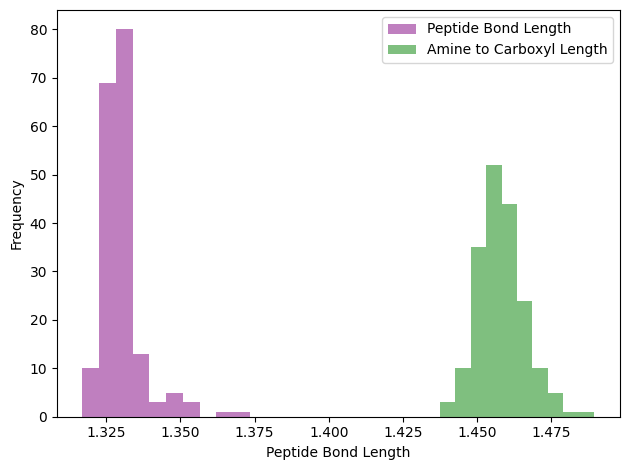

In [47]:
# Plot Histogram of Bond Distances
plt.hist(peptide_bond_length, alpha = 0.5, color = 'purple', label = "Peptide Bond Length")
plt.hist(amine_carboxyl_length, alpha = 0.5, color = 'green', label = "Amine to Carboxyl Length")

plt.ylabel("Frequency")
plt.xlabel("Peptide Bond Length")
plt.legend()

plt.tight_layout()
plt.show()

# 1.d Explanation

What could explain the observed difference in the mean bond lengths? Use the chemical structure of a polypeptide to explain the observation. 


# <font color='red'>Student Input Cell: 5 points</font>   

The peptide bond length is shorter because although it is a single bond, it is actually partly is a double bond due to the electrons exchanging between the double bond on the carboxyl group 

# 2. Ligand-binding interactions.

# 2.a Hydrogen Bond identification.

From the coordinates in the structure, calculate how many hydrogen bonds between N and O atoms are formed between mDHFR and MTX, and list the residues (identity and position) in mDHFR & MTX that contribute, along with their distances from each other. Make sure you look for N and O atoms from both molecules! The radii for N & O are 1.5 and 1.6 Å, respectively, so a hydrogen bond will bring them closer together.

SO THE DISTANCE MUST BE LESS THAN 3.1


# <font color='red'>Student Input Cell: 10 points</font>   

In [213]:
distance_cutoff = 3.1 # 1.5 and 1.6 for N & O, respectively

def euclidean_distance(atom1, atom2):
    return np.linalg.norm(np.array(atom1) - np.array(atom2))

# Iterate over atoms in mDHFR and MTX
hydrogen_bonds = 0
bonds_ON = []
bonds_sidechain_NO = []
bonds_bb_NO = []


for i in range(len(aa_res)):
    for ID in range(len(aa_res[i]["O"])):
        O_aa_sc = aa_res[i]["O"][ID][1]
        for j in range(len(mtx_res["N"])):
            N_mtx1 = mtx_res["N"][j][1]
            distance_o = euclidean_distance(O_aa_sc, N_mtx1)
            if distance_o < distance_cutoff:
                hydrogen_bonds += 1
                bonds_ON.append([aa_res[i]["O"][ID][0],O_aa_sc, aa_res[i]["name"], mtx_res["N"][j][0], N_mtx1, 0, distance_o])

for x in range(len(aa_res)):
    O_aa_bb = aa_res[x]["N"][0][1]
    for y in range(len(aa_res[x]["N"])-1):
        O_aa_sc = aa_res[x]["N"][y+1][1]
        for z in range(len(mtx_res["O"])):
            N_mtx1 = mtx_res["O"][z][1]
            distance_o = euclidean_distance(O_aa_sc, N_mtx1)
            if distance_o < distance_cutoff:
                bonds_sidechain_NO.append([aa_res[x]["N"][y+1][0], O_aa_sc, aa_res[x]["name"], mtx_res["O"][z][0], N_mtx1, 0, distance_o])
            distance_bb = euclidean_distance(O_aa_bb, N_mtx1)
            if distance_bb < distance_cutoff:
                bonds_bb_NO.append([aa_res[x]["N"][y+1][0], O_aa_bb, aa_res[x]["name"], mtx_res["O"][z][0], N_mtx1, 0, distance_o])


print("Number of hydrogen bonds: ", len(bonds_ON + bonds_sidechain_NO + bonds_bb_NO))
print("Number of bonds formed betwwen O in aa_res and N in mtx_res: ", len(bonds_ON))
print("Number of hydrogen bonds between N in aa_res and O in mtx_res (backbone): ", len(bonds_bb_NO))
print("Number of hydrogen bonds between N in aa_res and O in mtx_res (sidechain): ", len(bonds_sidechain_NO))

#print(bonds_ON)
#print(bonds_bb_NO)
#print(bonds_sidechain_NO)

Number of hydrogen bonds:  8
Number of bonds formed betwwen O in aa_res and N in mtx_res:  4
Number of hydrogen bonds between N in aa_res and O in mtx_res (backbone):  0
Number of hydrogen bonds between N in aa_res and O in mtx_res (sidechain):  4


# 2.b Residue interactions.

At least one of the amino acid residues involved in forming an H-bond with MTX has an apolar side chain. Which amino acids that you identified have apolar side chains? Can any of them form hydrogen bonds with MTX? If so, how so?


# <font color='red'>Student Input Cell: 5 points</font>   

"val" and "ile" which are Valine and Isoleucine! The bond would have to form between the oxygen in the carboxyl group of Valine and Isoleucine

# 3. Analyze bond angles


# 3a. Generate a Ramachandran plot.

To make life easier, I've had you pip install a library that does these calculations for you. Run the code below, and answer the HW questions.

A:ARG2 [-115.07292493293674, -53.39283243348543]
A:PRO3 [-74.22829785257417, 148.66764843621934]
A:LEU4 [-108.9170941457252, 136.4136915026691]


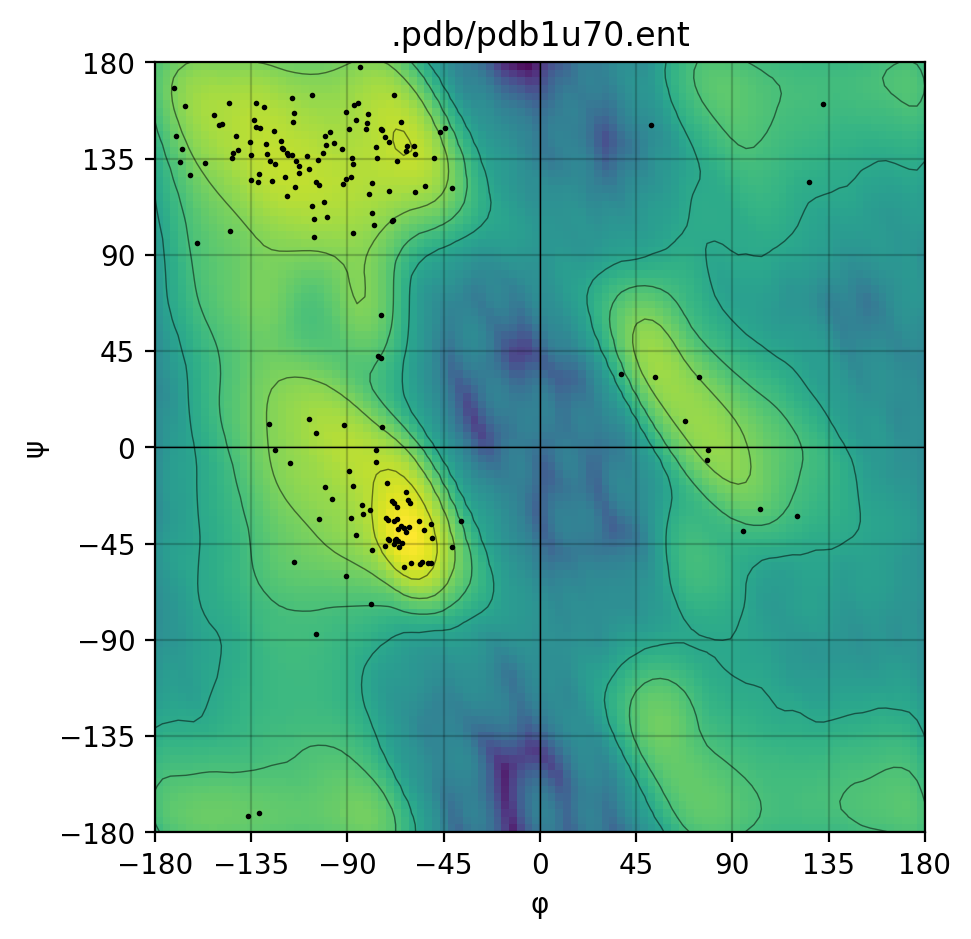

In [80]:
# Drawing the Ramachandran plot
plot(fetch_pdb(PDB_id))

# Generating a dictionary to store the phi and psi angles
phi_psi_dict = get_phi_psi(fetch_pdb(PDB_id)) #return_ignored=False)

for residue, angles in list(phi_psi_dict.items())[:3]:
    print(residue, angles)

# 3b. Interpret Ramachandran Plot.

Based on your Ramachandran plot, does this protein have beta sheets, alpha helices, or both? What sort of structures are the residues in the "forbidden" zone likely participating in?

# <font color='red'>Student Input Cell: 5 points</font>   

This protein appears to habe beta sheets as well as alpha helices! Given the clusters that are around -100 phi and 135 psi (beta sheet), and around -60 phi and -45 psi. Structures in the forbidden zone are most likely left-handed helices, where the R-groups are facing inward. I would presume this is indicative that this residue has many hydrophobic R-groups? Given that left-handed helices are energetically unstable due to the steric hindrance


# 3.c Calculate and Plot Omega Angles

For this question, you will need to use the dihedral function I provided up above. You will need to use the right residues in your calculation. Plot the resulting angles you calculate.

# <font color='red'>Student Input Cell: 5 points</font>   

In [214]:
<img src="http://www.gordus.org/public_images/dihedral2.png" alt="Drawing" style="width: 250px;"/>


SyntaxError: invalid syntax (3695845339.py, line 1)

In [ ]:
#Calculate omega angles
def dihedral(v1,v2,v3,v4): 
    b1 = v2 - v1
    b2 = v3 - v2
    b3 = v4 - v3
    
    m = np.cross(b2,b1) / np.linalg.norm(np.cross(b2,b1))
    n = np.cross(b3,b2) / np.linalg.norm(np.cross(b3,b2))
    

    return np.arccos(np.dot(m,n))

v1 = 
v2 = 
v3 =
v4 =

angles = dihedral()



# 3.d Interpret Omega Angles

How many cis peptide bonds does the structure contain? Explain your reasoning.

# <font color='red'>Student Input Cell: 5 points</font>   

# 4. AlphaFold

You have two pdb files named `2kdl1.pdb` and `2kdm1.pdb`. The sequences for each peptide are the following:

### 2kdl1

`TTYKLILNLKQAKEEAIKELVDAGTAEKYIKLIANAKTVEGVWTLKDEIKTFTVTE`

### 2kdm1

`TTYKLILNLKQAKEEAIKEAVDAGTAEKYFKLIANAKTVEGVWTYKDEIKTFTVTE`

These two peptides differ by 3 residues.

Use this Colab Notebook to predict the structures:

https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb


Download PyMol here:

https://nam02.safelinks.protection.outlook.com/?url=https%3A%2F%2Fpymol.org%2Fep&data=05%7C02%7Cagordus%40jhu.edu%7Ceda95088e5ea44dca8c508dc399d47fe%7C9fa4f438b1e6473b803f86f8aedf0dec%7C0%7C0%7C638448594888572284%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C0%7C%7C%7C&sdata=zdtpXmfmNSjeYBQKby4moPulGmFygQOgTkY7j7bWE7o%3D&reserved=0

USERNAME: jun2021

PASSWORD: betabarrel

Make sure to install PyMol AND save the license file. Use PyMol to open the two pdb files. Compare these to what AlphaFold predicted. Do they match? How are the two structures the same or different?

# <font color='red'>Student Input Cell: 5 points</font>   